In [1]:
import galsim
from om10 import DB
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
realizer_path = os.path.join(os.environ['SLREALIZERDIR'], 'slrealizer')
sys.path.insert(0, realizer_path)
from realize_om10 import OM10Realizer
from utils.utils import *
from utils.constants import *
#from realize_sl import SLRealizer

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Includes:
# 1. Determining nx, ny, and pixel scale for GalSim's drawImage and 
# 2. Comparing the true and emulated images
# 3. Comparing the HSM output with the analytically derived properties

## 1. Checking that all functions of OM10Realizer run as expected

I write this test in a notebook because I'll need to look at images for each (nx, ny, pixel scale) configuration and qualitatively judge whether it will be okay for HSM shape estimation. First, I define the filepath for the test lens catalog and test observation history. I created these files just for testing purposes; they only have one row each.

In [2]:
data_path = os.path.join(os.environ['SLREALIZERDIR'], 'data')

test_catalog_f = os.path.join(data_path, 'test_catalog.fits')
observation_f = os.path.join(data_path, 'twinkles_observation_history.csv')

In [3]:
f = os.path.join(data_path, 'qso_mock.fits')
from astropy.io import fits
hdul = fits.open(f)

In [9]:
d = hdul[1].data


In [20]:
from astropy.table import Table
t = Table(d)
t

LENSID,FLAGTYPE,NIMG,ZLENS,VELDISP,ELLIP,PHIE,GAMMA,PHIG,ZSRC,XSRC,YSRC,MAGI_IN,MAGI,IMSEP,XIMG [4],YIMG [4],MAG [4],DELAY [4],KAPPA [4],FSTAR [4],DD,DDLUM,ABMAG_I,APMAG_I,KCORR,DS,DDS,SIGCRIT,DSLUM,L_I,REFF,REFF_T
int32,int16,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
14428,0,2,0.062,264.2409,0.2182095,86.19403,0.04307117,-172.995,4.01,-0.8669144,0.2832836,22.81,22.94768,3.858949,0.9541 .. 0.0,-0.2678 .. 0.0,-0.8809 .. 0.0,26.034 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,246.488327,278.000397,-22.8653774,14.4168491,0.061999999,1432.53,1380.28,0.0,35956.6,0.0,0.0,0.0
21703,0,2,0.072,165.1962,0.286398,131.0021,0.06827481,-174.4367,1.19,-0.4895263,0.23893,22.55,23.27365,1.553578,-1.2262 .. 0.0,0.5434 .. 0.0,1.8811 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,282.910126,325.115814,-21.6407204,15.9914694,0.0719999969,1708.45,1569.97,0.0,8193.9,0.0,0.0,0.0
31711,0,2,0.082,155.9553,0.2997531,-19.01642,0.05930104,-120.289,4.01,0.1881534,0.1275117,22.51,21.93714,1.339839,-0.3014 .. 0.0,-0.3255 .. 0.0,-1.6949 .. 0.0,3.11 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,318.475311,372.84671,-21.497221,16.4424324,0.0820000023,1432.53,1363.75,0.0,35956.6,0.0,0.0,0.0
34331,0,2,0.084,172.5838,0.3209525,154.4568,0.06519084,135.9098,1.89,0.3275911,-0.2698931,22.09,21.40345,1.788124,1.0769 .. 0.0,-0.8203 .. 0.0,1.882 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,325.486664,382.465057,-21.7644787,16.2324791,0.0839999989,1735.9,1613.81,0.0,14498.4,0.0,0.0,0.0
51810,0,2,0.096,244.9063,0.1280685,66.05098,0.05353751,-138.9056,3.08,-0.03555227,-0.4760428,21.77,20.8123,3.250252,-0.6907 .. 0.0,-2.0784 .. 0.0,3.1558 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,366.86554,440.684723,-22.6915607,15.6250792,0.0960000008,1576.27,1477.72,0.0,26239.2,0.0,0.0,0.0
83414,0,2,0.114,154.17,0.3515839,44.12341,0.08975841,117.6485,1.61,-0.08977614,-0.05239099,19.99,18.43945,1.111688,-0.4754 .. 0.0,-0.5223 .. 0.0,4.2563 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,426.772461,529.622864,-21.4910202,17.242815,0.114,1747.5,1565.34,0.0,11904.1,0.0,0.0,0.0
115074,0,2,0.128,113.5011,0.2432515,153.0029,0.07510341,122.0065,1.06,-0.1656299,0.1122722,23.19,23.11888,0.6968272,0.1132 .. 0.0,-0.0756 .. 0.0,-1.0677 .. 0.0,2.387 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,471.641754,600.109436,-20.6982002,18.3209515,0.128000006,1673.38,1415.12,0.0,7101.16,0.0,0.0,0.0
125027,0,2,0.13,247.1724,0.1890702,-145.5595,0.1368733,111.1937,2.08,0.2226522,0.4874033,22.71,21.87704,3.266804,-0.5457 .. 0.0,-0.909 .. 0.0,-2.1537 .. 0.0,29.453 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,477.932434,610.271912,-22.7412186,16.3163967,0.129999995,1718.51,1543.17,0.0,16302.5,0.0,0.0,0.0
147709,0,2,0.138,200.9093,0.1228137,141.6722,0.07074275,-99.27816,2.23,0.2850695,0.336907,22.67,22.45241,2.13716,-0.4212 .. 0.0,-0.4333 .. 0.0,-1.2219 .. 0.0,16.602 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,502.80249,651.151367,-22.2036209,17.0027885,0.137999997,1701.2,1524.06,0.0,17748.4,0.0,0.0,0.0


We will read them in as OM10 DB and Pandas dataframe, respectively, and use them to create our OM10Realizer object.

In [14]:
test_db = DB(catalog=test_catalog_f)
#test_db.select_random(maglim=23.3, area=18000.0, IQ=0.75)
test_db.paint(synthetic=True)

test_obs = pd.read_csv(observation_f).sample(1, random_state=123).reset_index(drop=True)

om10realizer = OM10Realizer(observation=test_obs, catalog=test_db, debug=True)

OM10: Full db.lenses table contains 1 systems
OM10: Initial db.sample contains 1 systems


In [ ]:
from om10 import DB
from realize_om10 import OM10Realizer

# Create OM10 DB instance
om10_db = DB(catalog=catalog_path)
# Simulate colors (ugrizy magnitudes)
om10_db.paint(synthetic=True)

# Read observation data into a dataframe
minion_df = pd.read_csv(minion1016_path)
# Create OM10Realizer instance
realizer = OM10Realizer(observation=minion_df,
                        catalog=om10_db)

# Generate source table 
# and save as output_source_table_path
realizer.make_source_table_vectorized(save_file=output_source_table_path)
# Generate object table from source table at output_source_table_path
# and save as output_object_table_path
realizer.make_object_table(sourceTablePath=output_source_table_path,
                           objectTablePath=output_object_table_path)

These are equivalents of the lensInfo and obsInfo parameters that are input to many of the methods in OM10Realizer. We save the values to test individual methods.

In [15]:
test_lensInfo = test_db.sample[0]
test_obsInfo = test_obs.loc[0]

In [16]:
test_obsInfo

obsHistID         1907745
expMJD            62390.2
filter                  i
FWHMeff           0.98052
fiveSigmaDepth    23.4774
Name: 0, dtype: object

In [17]:
test_lensInfo

LENSID,FLAGTYPE,NIMG,ZLENS,VELDISP,ELLIP,PHIE,GAMMA,PHIG,ZSRC,XSRC,YSRC,MAGI_IN,MAGI,IMSEP,XIMG [4],YIMG [4],MAG [4],DELAY [4],KAPPA [4],FSTAR [4],DD,DDLUM,ABMAG_I,APMAG_I,KCORR,DS,DDS,SIGCRIT,DSLUM,L_I,REFF,REFF_T,weight,r_SDSS_lens,g_SDSS_lens,i_SDSS_lens,z_SDSS_lens,u_SDSS_lens,r_SDSS_quasar,g_SDSS_quasar,i_SDSS_quasar,z_SDSS_quasar,u_SDSS_quasar
int32,int16,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
6136045,0,4,0.524,149.6236,0.1070683,-134.1357,0.1467352,-16.22032,1.83,0.02024617,0.1071905,25.45,22.09077,0.6987287,-0.0375 .. 0.0071,-0.2501 .. 0.4468,-1.2993 .. -84.5576,6.805 .. 0.026,0.0 .. 0.0,0.0 .. 0.0,1290.3905,2997.02979,-21.7199993,21.1874561,0.523999989,1740.0,1045.1,0.0,13935.5,0.0,0.0,0.0,1.0,21.209381992994647,23.01900627268662,20.073196070473006,19.54866488279912,25.382583844848096,25.71341210492551,25.77487285889792,25.45,25.430733485421314,25.942860987100303


In [23]:
np.radians(test_lensInfo['PHIE']), np.deg2rad(test_lensInfo['PHIE'])

(-2.3411096094673582, -2.3411096094673582)

In [18]:
s = galsim.Shear(e1=0.4, e2=-0.3)
#print("q", np.exp(-s.eta))
#print("beta", s.beta)
l = galsim.Gaussian(sigma=0.6, flux=21.0).shear(s)
#q = galsim.Gaussian(sigma=0.0, flux=11.0).shift((5.0, 7.0))
#psf = galsim.Gaussian(sigma=7.0)
total = l

#total = l
#convolved = galsim.Convolve([total, psf])

convolved = total
img = convolved.drawImage(nx=64, ny=64, method='no_pixel', scale=0.1)


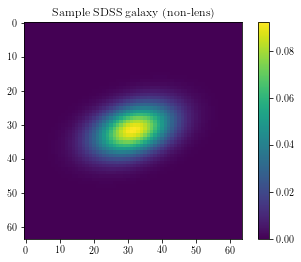

In [19]:
plt.imshow(img.array)
plt.title("Sample SDSS galaxy (non-lens)")
plt.colorbar()

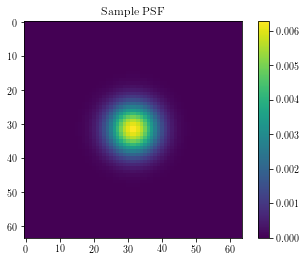

In [56]:
psf = galsim.Gaussian(sigma=1.0)
psf_img = psf.drawImage(nx=64, ny=64, scale=0.2, method='no_pixel')
plt.imshow(psf_img.array)
plt.title("Sample PSF")
plt.colorbar()

In [32]:
q = ((1.0-s.e)/(1+s.e))**0.5
beta = 0.5*np.arctan(0.3/0.7)
q, beta

(0.3678941968349128, 0.20244589314254172)

In [33]:
a = 13.0/(q**0.5)
b = 13.0*q**0.5
print("a, b:", a, b)
lam1 = a**2.0
lam2 = b**2.0
Sig_11 = lam1*(np.cos(beta))**2.0 + lam2*(np.sin(beta))**2.0
Sig_12 = (lam1 - lam2)*np.cos(beta)*np.sin(beta)
Sig_22 = lam1*(np.sin(beta))**2.0 + lam2*(np.cos(beta))**2.0
print("Sig", Sig_11, Sig_12, Sig_22)
new_e1 = (Sig_11 - Sig_22)/(Sig_11 + Sig_22)
new_e2 = 2.0*Sig_12/(Sig_11 + Sig_22)
print("out e1, e2", new_e1, new_e2)

('a, b:', 21.43294668511006, 7.8850567065240735)
('Sig', 443.31352444109, 78.2317984307806, 78.2317984307806)
('out e1, e2', 0.6999999999999998, 0.3)


In [34]:
img.FindAdaptiveMom().moments_sigma

12.35558795928955

In [ ]:
lens_flux = 37.0/48.0
q_flux = 11.0/48.0
Q_11 = lens_flux*Sig_11 + 

In [35]:
0.5*np.arctan(2.0*Sig_12/(Sig_11-Sig_22))
#0.5*(Sig_11+Sig_22+np.sign(Sig_11-Sig_22)*((Sig_11-Sig_22)**2.0 + 4.0*Sig_12**2.0)**0.5)

0.20244589314254174

In [12]:
img.calculateMomentRadius(rtype='trace')/((Sig_11+Sig_22)*0.5)**0.5, img.calculateMomentRadius(rtype='det')/(Sig_11*Sig_22-Sig_12**2.0)**0.25

(0.9978106644289849, 0.9987500756904727)

In [ ]:
img.calcula

In [153]:
np.sign(-3)

-1

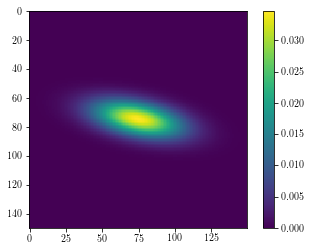

In [132]:
plt.imshow(img.array)
plt.colorbar()

In [126]:
img.calculateMomentRadius(rtype='trace')

13.346961067122452

In [120]:
(13.0**2.0 + 7.0**2.0)**0.5

14.7648230602334

In [113]:
mom = img.FindAdaptiveMom()

In [114]:
mom.observed_shape.e1, mom.observed_shape.e2

(-1.1772305305330234e-15, 5.268154502672623e-18)

In [115]:
mom.moments_sigma

13.0

### 1.1 Converting OM10 catalog values into GalSim input parameters

In [7]:
galsimInput = om10realizer._om10_to_galsim(test_lensInfo, test_obsInfo['filter'])
galsimInput

{'beta': galsim.Angle(-2.3411096094673582, galsim.radians),
 'e': 0.1070683,
 'flux': 9.952860809659875,
 'flux_0': 0.08584389969962691,
 'flux_1': 1.4577870583563612,
 'flux_2': 4.345420449152838,
 'flux_3': 5.586665229924711,
 'half_light_radius': 0.0,
 'num_objects': 4,
 'xy_0': (-0.0375, -0.2501),
 'xy_1': (0.254, 0.3703),
 'xy_2': (-0.0772, 0.4475),
 'xy_3': (0.0071, 0.4468)}

### 1.2 Drawing the true image via GalSim's drawImage

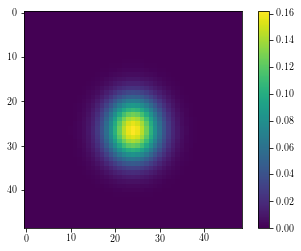

In [36]:
trueImg = om10realizer.draw_system(lensInfo=om10_db.sample[0], 
                                   obsInfo=minion_df.loc[0])
plt.imshow(trueImg.array)
plt.colorbar()

### 1.3 Running HSM's shape estimation on the true image

In [9]:
hsmOutput = om10realizer.estimate_hsm(lensInfo=test_lensInfo, obsInfo=test_obsInfo)
hsmOutput

{'apFlux': 21.428565979003906,
 'det': 0.041241882360691456,
 'e1': -0.1216282993555069,
 'e2': -0.003573226742446422,
 'hlr': 0.5261734613336309,
 'trace': 0.4027072469799542,
 'x': 0.002587947144025904,
 'y': 0.2319169491317993}

### 1.4 Drawing the emulated image via GalSim's drawImage

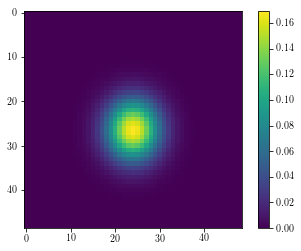

In [10]:
emulatedImg = om10realizer.draw_emulated_system(lensInfo=om10_db.sample[0], 
                                                obsInfo=minion_df.loc[0])
plt.imshow(emulatedImg.array)
plt.colorbar()

In [ ]:
emulatedImg = om10realizer.draw_emulated_system(lensInfo=test_lensInfo, obsInfo=test_obsInfo)
plt.imshow(emulatedImg.array)
plt.colorbar()

## 2. Comparing the true image vs. emulated image

### 2.1 First moments x, y

Qualitatively, the two images look similar. When we take the difference of the images, it seems that their centers have a slight offset. Let's investigate why.

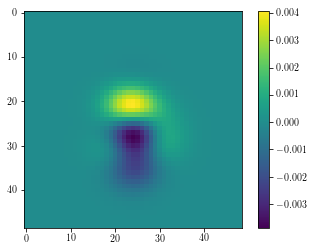

In [11]:
plt.imshow(trueImg.array-emulatedImg.array)
plt.colorbar()

In [12]:
estEmulated = emulatedImg.FindAdaptiveMom()
pixel_to_physical(estEmulated.moments_centroid.x, om10realizer.nx, om10realizer.pixel_scale)

0.0020178531885260754

### 2.2 Second moments (half-light radius)

If the shear is not too dramatic, `calculateHLR` works fairly well to estimate the true HLR. Let us first compare the HLR of the emulated image to the true HLR.

In [13]:
from utils.utils import physical_to_pixel
phys_x = physical_to_pixel(hsmOutput['x'], canvasSize=om10realizer.nx, pixel_scale=om10realizer.pixel_scale)
phys_y = physical_to_pixel(hsmOutput['y'], canvasSize=om10realizer.ny, pixel_scale=om10realizer.pixel_scale)
pixelCenter = galsim.PositionD(x=phys_x, y=phys_y)

In [14]:
emulated_hlr = emulatedImg.calculateHLR(center=pixelCenter)

The HLRs of the true and emulated images do not agree to floating-point precision.

In [15]:
print(np.allclose(hsmOutput['hlr'], emulated_hlr))
print(hsmOutput['hlr'], emulated_hlr)

False
(0.5261734613336309, 0.5246876529813276)


It turns out that the emulated image is 1% bigger!

In [16]:
print((emulated_hlr-hsmOutput['hlr'])/hsmOutput['hlr'])

-0.00282379949102216


We've compared the half-light radius, but what goes in the source table (and stored in `hsmOutput['trace']`) is the trace of the second moment from `calculateMomentRadius(rtype='trace')`

In [17]:
hsmOutput['trace']

0.4027072469799542

### 2.3 Flux

It doesn't make sense to use HSM's flux estimation (`moments.amp`) when we have access to the true flux, i.e. the sum of the lens flux and the four (quasar) image fluxes is the true total flux. So we bypass HSM and store the sum of the true image's pixel values as flux. So we expect that the flux values of true and emulated images agree within floating-point precision.

In [18]:
l_flux = galsimInput['flux']
g_fluxes = [galsimInput['flux_' + str(i)] for i in range(4)]
true_tot_flux = l_flux + np.sum(g_fluxes)
print(np.allclose(true_tot_flux, hsmOutput['apFlux']))

True


## 3. Comparing the HSM output with the analytically derived properties

### 3.1 Second moments

Here, we compare GalSim's numerical calculation of the second moment with the analytically derived moments. This is a good test for the analytical calculations! First, we render a high-res image of our test object so that GalSim can do a more precise moment calculation.

In [ ]:
om10realizer.nx, om10realizer.ny = 101, 101
om10realizer.pixel_scale = 0.05
trueImgHR = om10realizer.draw_system(lensInfo=test_lensInfo, obsInfo=test_obsInfo)
plt.imshow(trueImgHR.array)
plt.colorbar()

We run our analytical moment calculation on the object parameters and the HSM shape estimation on the image.

In [ ]:
derivedProps = om10realizer._om10_to_lsst(lensInfo=test_lensInfo, obsInfo=test_obsInfo)
outputHSM = trueImgHR.FindAdaptiveMom()

The GalSim function `calculateMomentRadius(rtype='trace')` returns $\sqrt{\frac{I_{xx} + I_{yy}}{2}}$ whereas setting the parameter `rtype='det'` returns $\left( I_{xx} \times I_{yy} - I_{xy}^2 \right)^{1/4}$. We make adjustments to get just the trace and the determinant. Alternatively, we can call `FindAdaptiveMom` on the image. We do both here.

In [ ]:
# Numerical trace, determinant
anaIx = derivedProps['x']
anaIy = derivedProps['y']
anaCentroid = galsim.PositionD(x=physical_to_pixel(anaIx, 101, 0.05), y=physical_to_pixel(anaIy, 101, 0.05))

numTrace = trueImgHR.calculateMomentRadius(rtype='trace', center=anaCentroid)**2.0*2.0
numDet = trueImgHR.calculateMomentRadius(rtype='det', center=anaCentroid)**4.0
numDetHSM = (outputHSM.moments_sigma*om10realizer.pixel_scale)**4.0
print("Numerical trace: %f, numerical determinant %f or %f (HSM)" %(numTrace, numDet, numDetHSM))

# Analytical trace, determinant
print("Analytical trace: %f, analytical determinant %f" %(derivedProps['trace'], derivedProps['det']))

print(np.allclose([derivedProps['trace'], derivedProps['det']], [numTrace, numDet], atol=1.e-3, rtol=1.e-3))

The numerical and analytical calculations of trace and determinant agree!

### 3.2 First moments

Of course, the second moment calculation depends on a successful calculation of the first moment, which is an input. We should've actually checked for this first.

Since HSM runs on the image, it suffers from some sub-pixel error. But we see that the numerical and analytical first moment calculations agree within the pixel precision.

In [ ]:
print(anaCentroid.x, anaCentroid.y)
print(outputHSM.moments_centroid.x, outputHSM.moments_centroid.y)

### 3.2 Ellipticities

Unfortunately, we see some differences in the leading digits between the numerical and analytical $e_1$ and $e_2$. One possible explanation is that the sub-pixel error in the HSM's first moment calculation becomes significant as we convert from pixels to arcseconds, and the error propagates into the second moment calculation. Since ellipticities are ratios between linear combinations of second moments, it is vulnerable to very small errors in either the numerator or the denominator.

In [ ]:
print("Numerical e1, e2: (%f, %f)" %(outputHSM.observed_shape.e1, outputHSM.observed_shape.e2))
print("Analytical e1, e2: (%f, %f)" %(derivedProps['e1'], derivedProps['e2']))